# Logistic Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df = df.dropna()
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded = df_encoded.reset_index()
df_encoded.drop(['index', 'id'], axis=1, inplace=True)

In [ ]:
X = df_encoded[df_encoded.columns[:-1]]
y = df_encoded['stroke']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( df_encoded[df_encoded.columns[:-1]],  df_encoded['stroke'], test_size=0.2, random_state=0)

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, Y_train)
print(f"intercept: {model.intercept_}, coef: {model.coef_}")
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))
model.score(X_test, Y_test)

intercept: [-6.80760302], coef: [[-5.68228958e-02  5.08412834e-02  5.42602367e-01  4.88529331e-01
  -2.46012731e-01 -1.05520869e-01  7.44438758e-02  1.66094623e-04
  -1.73466071e-03  9.90418567e-02]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9562118126272913

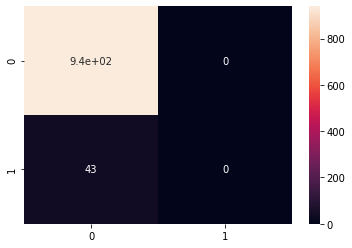

In [ ]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True)

Text(0.5, 257.44, 'Predicted label')

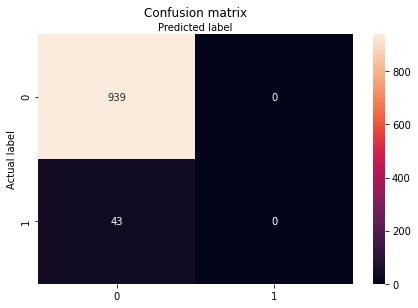

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

(array([  2.,   0.,   3.,   8.,  15.,  32.,  40., 102., 182., 598.]),
 array([0.62499131, 0.6623796 , 0.69976789, 0.73715619, 0.77454448,
        0.81193277, 0.84932106, 0.88670935, 0.92409764, 0.96148593,
        0.99887422]),
 <a list of 10 Patch objects>)

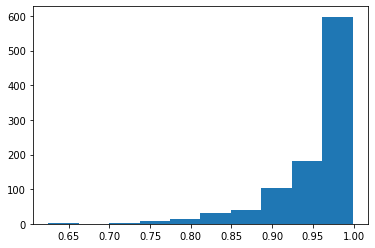

In [ ]:
y_pred_proba = model.predict_proba(X_test)
plt.hist([max(x) for x in y_pred_proba])

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


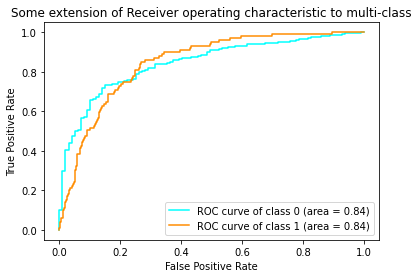

In [ ]:
y_binarize = label_binarize(y, classes=[0, 1, 2])

X_train, X_test, y_train, y_test = train_test_split(X, y_binarize, test_size=.5, random_state=0)
classifier = OneVsRestClassifier(LogisticRegression(max_iter=10000))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
	fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
	roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['aqua', 'darkorange']
for i, color in zip(range(2), colors):
	plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})'
	''.format(i, roc_auc[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( df_encoded[df_encoded.columns[:-1]],  df_encoded['stroke'], test_size=0.2, random_state=0)

In [ ]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [ ]:
target_names = ['Stroke', 'No Stroke']
pca = PCA(n_components=2)
lda = LDA(n_components=2)

X_pca = pca.fit(X_train).transform(X_train)
X_lda = lda.fit(X_train, Y_train).transform(X_train)

print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
	plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')
plt.figure()

for color, i, target_name in zip(colors, [0, 1],  target_names):
	plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of dataset')
plt.show()

explained variance ratio (first two components): [0.99467479 0.00493013]


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(10, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


IndexError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
lda = LDA()
lda.fit(X, y)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid = {}
grid['solver'] = ['svd', 'lsqr', 'eigen']

search = GridSearchCV(lda, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results=search.fit(X, y)
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.950
Config: {'solver': 'svd'}


In [ ]:
qda = QDA()
qda.fit(X, y)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid = {}

search = GridSearchCV(qda, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results=search.fit(X, y)
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.887
Config: {}


# Ensemble Methods

In [ ]:
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier


In [ ]:
logistic_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

logistic_reg.fit(X_train, Y_train)
decision_tree.fit(X_train, Y_train)
knn.fit(X_train, Y_train)

log_pred = logistic_reg.predict(X_test)
decision_pred = decision_tree.predict(X_test)
knn_pred = knn.predict(X_test)

avg_preds = (log_pred + decision_pred + knn_pred)//3
accuracy = accuracy_score(Y_test, avg_preds)
print(accuracy)

0.9562118126272913


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
voting = VotingClassifier(estimators=[('KNN', knn), ('DTree', decision_tree), ('LogReg', logistic_reg)], voting='hard')
voting.fit(X_train, Y_train)
preds = voting.predict(X_test)
acc = accuracy_score(Y_test, preds)
f1 = f1_score(Y_test, preds, average="macro")
print('Accuracy: ', acc)
print('F1 Score: ', f1)

Accuracy:  0.9663951120162932
F1 Score:  0.49145520455722425


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logistic_reg_bagging_model = BaggingClassifier(base_estimator=logistic_reg, n_estimators=5)
decision_tree_bagging_model = BaggingClassifier(base_estimator=decision_tree, n_estimators=5)
random_forest = RandomForestClassifier(n_estimators=10)
extra_trees = ExtraTreesClassifier(n_estimators=10)

def bagging_ensemble(model):
  k_folds = KFold(n_splits=20)
  results = cross_val_score(model, X_train, Y_train, cv=k_folds)
  print(results.mean())

bagging_ensemble(logistic_reg_bagging_model)
bagging_ensemble(decision_tree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.953641355019165
0.9396340515901791
0.9533901377810006
0.9482958665699783
